In [1]:
from pystac import Item
from odc.stac import load
import numpy as np
import odc.geo.xr  # noqa: F401

In [15]:
item = Item.from_file("https://data.ldn.auspatious.com/test/geo_ls_lp/0_0_0/2023/119/-13/geo-ls-lp_2023_119_-13.stac-item.json")
data = load(
    [item],
    chunks={},
    crs="utm",
    resolution=30,
    nodata=np.nan
).compute().squeeze()

data

<xarray.Dataset> Size: 393MB
Dimensions:      (y: 5879, x: 5567)
Coordinates:
  * y            (y) float64 47kB -2.038e+06 -2.038e+06 ... -2.214e+06
  * x            (x) float64 45kB 1.987e+07 1.987e+07 ... 2.004e+07 2.004e+07
    spatial_ref  int32 4B 900913
    time         datetime64[ns] 8B 2023-01-01
Data variables:
    ndvi         (y, x) float32 131MB nan 303.5 314.4 302.5 ... nan nan nan nan
    msavi        (y, x) float32 131MB nan 214.5 234.4 186.3 ... nan nan nan nan
    evi2         (y, x) float32 131MB nan 211.0 227.6 188.8 ... nan nan nan nan

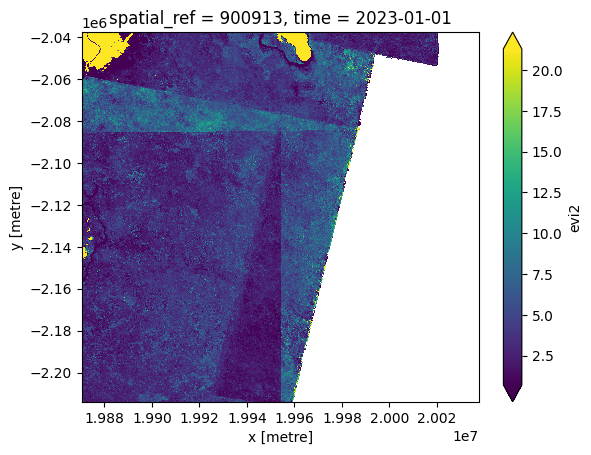

In [16]:
data.evi2.plot.imshow(robust=True)

In [17]:
data.evi2.odc.explore()